# La regresion lineal simple  
Para esta practica se utilizara del libro de Econometria de Wooldridge el modelo **"CEO Salary and Return on Equity"**. Donde se propone la siguiente ecuación:

$$Salary = \beta_0 + \beta_1 \cdot ROE + \epsilon$$

Ya que se pretende hacer sin ninguna librería que realice los cálculos matemáticos de forma automático se deben de importar de forma minima las siguientes librerías: *numpy, pandas y matplotlib.pyplot(para realizar las gráficas, no para cálculos)*.

Se deben de obtener los siguientes resultados para poder aceptar la forma en que se realizaron los cálculos

$$\widehat{Salary} = 963.1913 + 18.50119 \cdot ROE + \epsilon$$

Es decir

$$\hat{\beta_0} = 963.1913$$
$$\hat{\beta_1} = 18.50119$$

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para poder descargar los datos de Wooldridge se usara la librería "wooldridge"

In [79]:
import wooldridge as woo

De la siguiente forma se obtiene la base de datos y posteriormente se separan las variables según corresponde

In [80]:
Data = woo.dataWoo("ceosal1")

Data.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [81]:
y = Data["salary"]
y.head()

0    1095
1    1001
2    1122
3     578
4    1368
Name: salary, dtype: int64

In [82]:
x = Data["roe"]
x.head()

0    14.1
1    10.9
2    23.5
3     5.9
4    13.8
Name: roe, dtype: float64

Para comprender los datos es una buena practica visualizar los datos en una gráfica

Text(0.5, 1.0, 'Salary VS ROE')

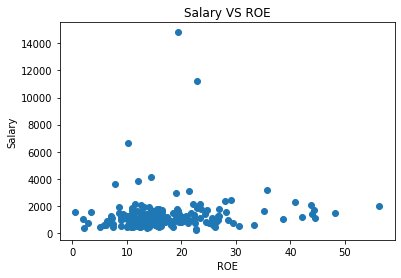

In [83]:
PLOT = plt.subplot()
PLOT.scatter(x=x, y=y)
PLOT.set_ylabel("Salary")
PLOT.set_xlabel("ROE")
PLOT.set_title("Salary VS ROE")

Ahora se determinaran los coeficientes de forma uno a uno, y posteriormente de forma matricial.

$$ \hat{\beta_1} = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2} $$
$$ \hat{\beta_0} = \bar{y} - \beta_1\bar{x} $$

Un punto importante a tomar en cuenta respecto a $\hat{\beta_1}$ es que:

$$\sum(x_i-\bar{x})(y_i-\bar{y}) = COV(x,y)$$

$$\sum(x_i-\bar{x})^2 = VAR(x)$$

$$ \hat{\beta_1} = \frac{COV(x,y)}{VAR(x)}$$

Entonces ya solo queda calcular

$$ \hat{\beta_0} = \bar{y} - \beta_1\bar{x} $$

In [84]:
# La forma simple

COV_XY = np.cov(x,y)[0,1] # Se hace de esta forma ya que 'np.cov' da la matriz var-covar
VAR_X = np.var(x, ddof=1) # ddof es la corrección de grados de libertad

Beta_1 = COV_XY / VAR_X


print(f'Beta_1 = {round(Beta_1,ndigits=5)}')

Beta_1 = 18.50119


In [85]:
y_mean = np.mean(y)
x_mean = np.mean(x)

Beta_0 = y_mean - Beta_1 * x_mean

print(f'Beta_0 = {round(Beta_0,ndigits=4)}')

Beta_0 = 963.1913


In [86]:
# La forma mas intensa

def variance(lst):
    m = sum(lst) / len(lst)
    return sum((xi - m) ** 2 for xi in lst) / (len(lst) - 1)

def covariance(x, y):
    mean_x, mean_y = sum(x) / len(x), sum(y) / len(y)
    cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x)))
    return cov / (len(x) - 1)

COV_XY = covariance(x, y)
VAR_X = variance(x)

Beta_1 = COV_XY / VAR_X
print(f'Beta_1 = {round(Beta_1, ndigits=5)}')

y_mean = sum(y) / len(y)
x_mean = sum(x) / len(x)

Beta_0 = y_mean - Beta_1 * x_mean
print(f'Beta_0 = {round(Beta_0, ndigits=4)}')

Beta_1 = 18.50119
Beta_0 = 963.1913


De forma matricial se puede calcular de la siguiente forma:

$$ \bold{\hat{\beta}} = (X^TX)^-1X^Ty

In [103]:
# La forma matricial

def calcular_beta(X, y):

    X = X.values
    X = np.column_stack([np.ones(X.shape[0]), X]) # vector intercepto = zeros()

    y = y.values

    # Asegurarse de que X sea una matriz bidimensional
    if X.ndim == 1:
          X = X.reshape(-1, 1)
    if y.ndim == 1:
          y = y.reshape(-1, 1)# o X = X[:, np.newaxis]

    # Calculamos la matriz transpuesta de X
    X_transpuesta = np.transpose(X)

    # Calculamos X^T * X
    XTX = np.dot(X_transpuesta, X)

    # Calculamos la inversa de X^T * X
    XTX_inversa = np.linalg.inv(XTX)

    # Calculamos X^T * y
    XTy = np.dot(X_transpuesta, y)

    # Finalmente, calculamos el vector beta
    beta = np.dot(XTX_inversa, XTy)

    return beta

Beta_0_1 = calcular_beta(X=x, y=y)

print(f"Los valores del vector de beta son Beta_0:{Beta_0_1[0]} y Beta_1:{Beta_0_1[1]}")

Los valores del vector de beta son Beta_0:[963.19133647] y Beta_1:[18.50118635]


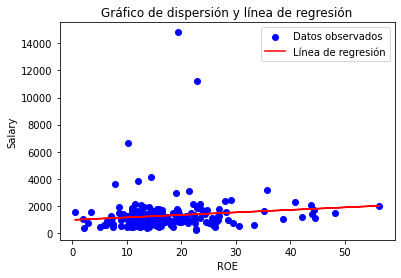

In [88]:
# Predicciones basadas en la línea de regresión
y_pred = [Beta_0 + Beta_1 * xi for xi in x]

# Gráfico
plt.scatter(x, y, color='blue', label='Datos observados')  # Puntos observados
plt.plot(x, y_pred, color='red', label='Línea de regresión')  # Línea de regresión
plt.title('Gráfico de dispersión y línea de regresión')
plt.xlabel('ROE')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Interpretación de los Coeficientes:
El coeficiente representa el cambio en la variable dependiente por una unidad de cambio en la variable independiente, manteniendo constantes otras variables. En este caso, el coeficiente para ROE indica cuánto cambia el salario del CEO por cada punto porcentual de cambio en el ROE. Es importante notar que la significancia y relevancia de este coeficiente deben ser evaluadas en el contexto económico y empresarial.

## Bondad de ajuste

$$ R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}} = \frac{Variabilidad Explicada}{Variabilidad Total} = \frac{\sum(y_i - \hat{y_i})^2}{\sum(y_i - \bar{y_i})^2} $$

y de forma matricial

$$ R^2 = \frac{Variabilidad Explicada}{Variabilidad Total} = 1 - \bold{\frac{e^Te}{y^Ty-n\bar{y}^2}} $$

Donde:

$\bold{e}$ es el vector de residuos.

$\bold{y}$ es el vector de las respuestas observadas.

$\bold{n}$ es el número de observaciones.

$\bold{y}$ es la media de las respuestas observadas.



In [89]:
SS_RES = sum((y - y_pred)**2)
SS_TOT = sum((y - y_mean)**2)

R2 = SS_RES / SS_TOT

print(f'El R^2 de este modelo es: {round(R2,ndigits=4)}')

El R^2 de este modelo es: 0.9868


## $R^2$ Adjusted

El coeficiente de determinación ajustado ($R^2_{ajustado}$ ) es una versión modificada del coeficiente de determinación ($R^2$) que toma en cuenta el número de variables predictoras o características utilizadas en el modelo de regresión. Mientras que el $R^2$ simplemente indica la proporción de la variabilidad total de la variable dependiente ($y$) que es explicada por el modelo, el $R^2$ ajustado tiene en cuenta el número de variables predictoras en el modelo y penaliza el uso de variables adicionales que pueden no aportar significativamente a la explicación de la variabilidad.

$$R^2_{adjustado} = \frac{1 - (1 - R^2) * (n - 1)}{(n - k - 1)}$$

Donde:

- $R^2$ es el coeficiente de determinación ($R^2$) calculado previamente.
- $n$ es el número de observaciones (tamaño del conjunto de datos).
- $k$ es el número de variables predictoras (número de características) en el modelo.


El $R^2_{ajustado}$ es siempre menor o igual que el $R^2$. Si el número de variables predictoras es pequeño o las variables tienen un impacto significativo en la explicación de la variabilidad, el $R^2$ ajustado no será muy diferente del $R^2$. Sin embargo, cuando el número de variables predictoras aumenta y algunas de ellas no son relevantes para el modelo, el R^2 ajustado penaliza ese uso innecesario y tiende a ser más bajo que el $R^2$.



Y se calculara de la siguiente forma:

In [112]:
#Función que realiza los procesos de R^2_Adj

def calcular_r_cuadrado_ajustado(y, y_pred, R2, k):
    n = len(y)
    k = k
    r_cuadrado = R2
    r_cuadrado_ajustado = 1 - (1 - r_cuadrado) * (n - 1) / (n - k - 1)
    return r_cuadrado_ajustado

r_cuadrado_ajustado = calcular_r_cuadrado_ajustado(y, y_pred, R2, k=1)

print(f'El R^2 de este modelo es: {round(R2,ndigits=4)}')
print(f'El R^2 ajustado de este modelo es: {round(r_cuadrado_ajustado,ndigits=4)}')


El R^2 de este modelo es: 0.9868
El R^2 ajustado de este modelo es: 0.9867
